In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import IPython.display as ipd
import librosa
import librosa.display
from IPython.display import Audio, display
import numpy as np

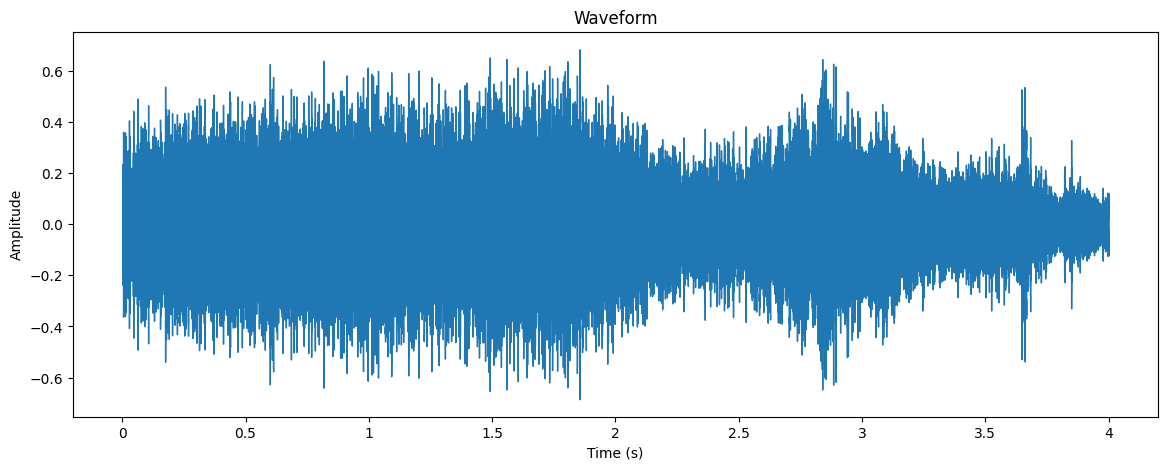

/tmp/ipykernel_10377/610027574.py:18: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), y_axis='log', x_axis='time')


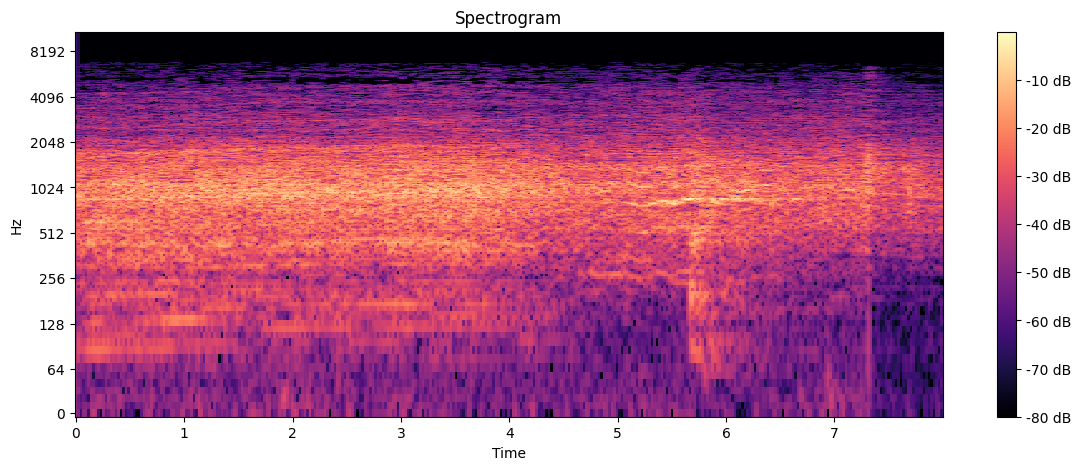

In [61]:
#alarm example
filename = '/kaggle/input/urbansound8k/fold3/103199-4-2-10.wav'

# Load the audio file
y, sr = librosa.load(filename, sr=None, mono=True)
data,sample_rate=librosa.load(filename)

# Display the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Play the audio
display(Audio(y, rate=sr))


In [4]:
sample_rate

22050

In [5]:
from scipy.io import wavfile as wav
import warnings

# Suppress the WavFileWarning
warnings.filterwarnings("ignore", category=wav.WavFileWarning)

wave_sample_rate, wave_audio = wav.read(filename)


In [6]:
wave_sample_rate

48000

In [7]:
import pandas as pd
metadata=pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [8]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [9]:
import librosa
audio_file_path='/kaggle/input/urbansound8k/fold1/101415-3-0-2.wav'
librosa_audio_data, librosa_sample_rate=librosa.load(audio_file_path)

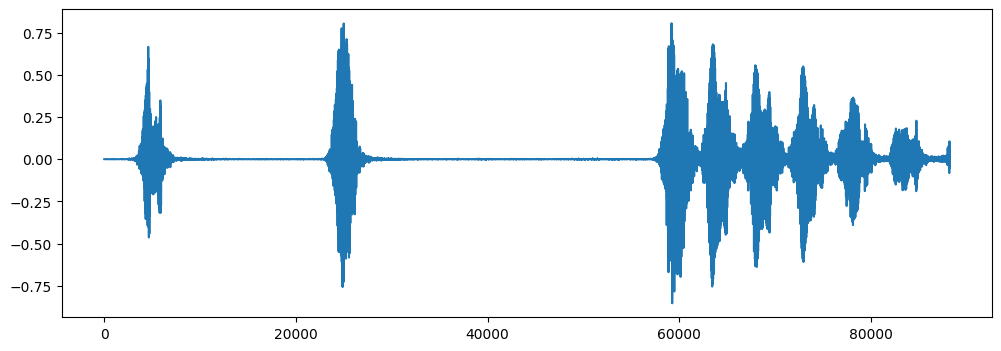

In [10]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [12]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

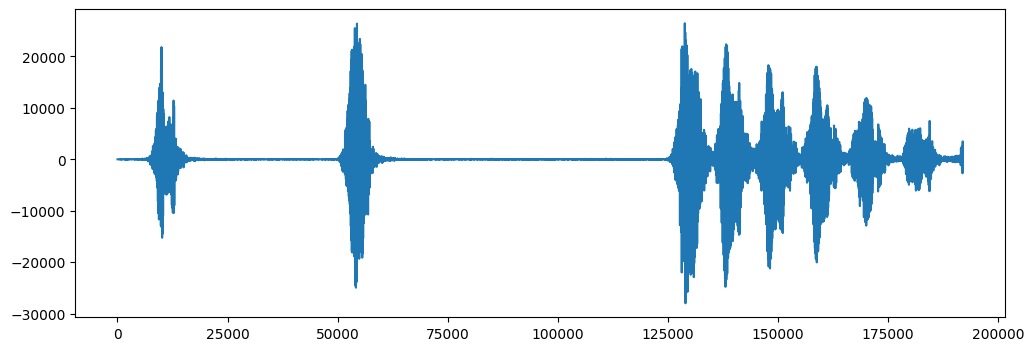

In [13]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [14]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [15]:
mfccs

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999216e+00,  1.6759439e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355551e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179771e+01,  3.2849552e+01],
       ...,
       [ 4.3309441e-01, -3.5408905e+00, -4.8356504e+00, ...,
        -5.2699099e+00, -1.2849629e-01,  7.5349188e-01],
       [ 4.4520652e-01, -3.2774835e+00, -4.6472917e+00, ...,
        -3.4224067e+00,  3.9007015e+00,  5.5314261e-01],
       [ 3.5697106e-01, -2.9899063e+00, -4.4125957e+00, ...,
        -2.6713352e+00,  2.7894583e+00,  1.4206108e-01]], dtype=float32)

In [16]:
import pandas as pd
import os
import librosa

audio_dataset_path='/kaggle/input/urbansound8k'
metadata=pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [17]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [18]:
import os
import librosa

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])



3554it [03:51, 16.58it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [08:16, 25.45it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [08:16, 28.78it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [08:38, 16.84it/s]


In [36]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [37]:

### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [38]:

X.shape

(8732, 40)

In [39]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [23]:

### Label Encoding
#y=np.array(pd.get_dummies(y))

In [40]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [41]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [42]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746937e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480602e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490705e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181942e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [43]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [28]:
X_train.shape

(6985, 40)

In [29]:
X_test.shape

(1747, 40)

In [30]:
y_test.shape

(1747, 10)

In [44]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [46]:
### No of classes
num_labels=y.shape[1]

In [34]:
Dense()

TypeError: Dense.__init__() missing 1 required positional argument: 'units'

In [47]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [67]:

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
207/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6705 - loss: 0.9692
Epoch 1: val_loss improved from inf to 0.79151, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6707 - loss: 0.9687 - val_accuracy: 0.7493 - val_loss: 0.7915
Epoch 2/100
215/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 1.0130
Epoch 2: val_loss did not improve from 0.79151
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6515 - loss: 1.0122 - val_accuracy: 0.7310 - val_loss: 0.8030
Epoch 3/100
206/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.9613
Epoch 3: val_loss improved from 0.79151 to 0.77297, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6794 - loss: 0.9630 - val_accuracy: 0.7556 - val_loss: 0.7730
Epoch 4/100
211/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.9401
Epoch 4: val_loss did not improve from 0.7

In [68]:

test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7813394665718079


In [69]:
prediction_feature.shape


(1, 40)

In [70]:
X_test[1]

array([-466.17957  ,    1.0950238,  -34.01389  ,   35.33935  ,
        -14.88148  ,  -19.12843  ,   -0.581684 ,  -16.130579 ,
        -21.339073 ,    7.673634 ,  -29.16449  ,  -18.950253 ,
         -2.9579995,   -8.162331 ,  -15.153101 ,   -6.604806 ,
         -7.5685973,    9.340646 ,   14.433101 ,   21.934181 ,
         20.861397 ,    1.3340123,  -19.228804 ,   -4.630231 ,
         -1.0564743,    3.215267 ,   -6.9842815,  -16.414577 ,
        -10.0286455,   13.009954 ,    0.5334608,  -23.84339  ,
        -15.267321 ,    9.245735 ,   10.367627 ,   -0.5832011,
         -1.2624055,   17.700018 ,   13.847463 ,   -5.1862826],
      dtype=float32)

In [72]:

# Use predict method to get raw predictions
raw_predictions = model.predict(X_test)

# Use numpy.argmax to get the index of the maximum value (predicted class)
predicted_class_indices = np.argmax(raw_predictions, axis=1)

# Display the predicted class indices
print("Predicted Class Indices:", predicted_class_indices)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted Class Indices: [5 3 4 ... 1 9 2]


In [83]:
# Use predict method to get raw predictions
raw_predictions = model.predict(mfccs_scaled_features)

# Use numpy.argmax to get the index of the maximum value (predicted class)
predicted_class_index = np.argmax(raw_predictions)

# Display the predicted class index
print("Predicted Class Index:", predicted_class_index)

# If you have a label encoder, you can use it to get the actual class label
# If labelencoder is a sklearn.preprocessing.LabelEncoder
predicted_label = labelencoder.classes_[predicted_class_index]

print("Predicted Class Label:", predicted_label)

filename="/kaggle/input/urbansound8k/fold1/103074-7-1-3.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Class Index: 7
Predicted Class Label: jackhammer
[-153.08543     82.7981     -15.69473     39.049652   -32.2682
   23.85321    -17.518566    15.130335    -9.961646     7.094282
  -18.728125    13.395837   -11.027374    16.487724    -2.2249467
    7.606876   -15.172634     8.061926   -16.4423      10.100869
   -5.346066     4.5780025   -3.6494598    3.3480134   -3.8289428
    7.250991    -3.178538     0.2391375   -3.7927663    6.499046
   -7.091801     3.036557    -6.101494     1.9272401   -8.121746
    4.5241656   -3.846401     1.3278546   -3.815893     2.2746844]
[[-153.08543     82.7981     -15.69473     39.049652   -32.2682
    23.85321    -17.518566    15.130335    -9.961646     7.094282
   -18.728125    13.395837   -11.027374    16.487724    -2.2249467
     7.606876   -15.172634     8.061926   -16.4423      10.100869
    -5.346066     4.5780025   -3.6494598    3.3480134   -3.8289428
     7.250991    -3.178538     0.2391375   -3.79276

ValueError: y should be a 1d array, got an array of shape (1, 10) instead.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class Index: 9
Predicted Class Label: gun_shot
